In [26]:
#IMPORTING CLASSES TO BE USED FOR DATA EXPLORATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Creating data frame
# Try decoding the file with different codecs
possible_codecs = ['utf-8', 'latin-1', 'cp1252']
for codec in possible_codecs:
    try:
        df = pd.read_csv("/content/IRIS.csv", encoding=codec)
        print(f"File decoded successfully with {codec} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with {codec} encoding.")

# If none of the codecs work, raise an error
else:
    raise ValueError("Unable to decode the file with any of the specified encodings.")

# Now df contains your DataFrame with the data from the CSV file, encoding='utf-8', latin = "")

File decoded successfully with utf-8 encoding.


In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
##CHECKING FOR EMPTY DATA SET/NULL ENTRY
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

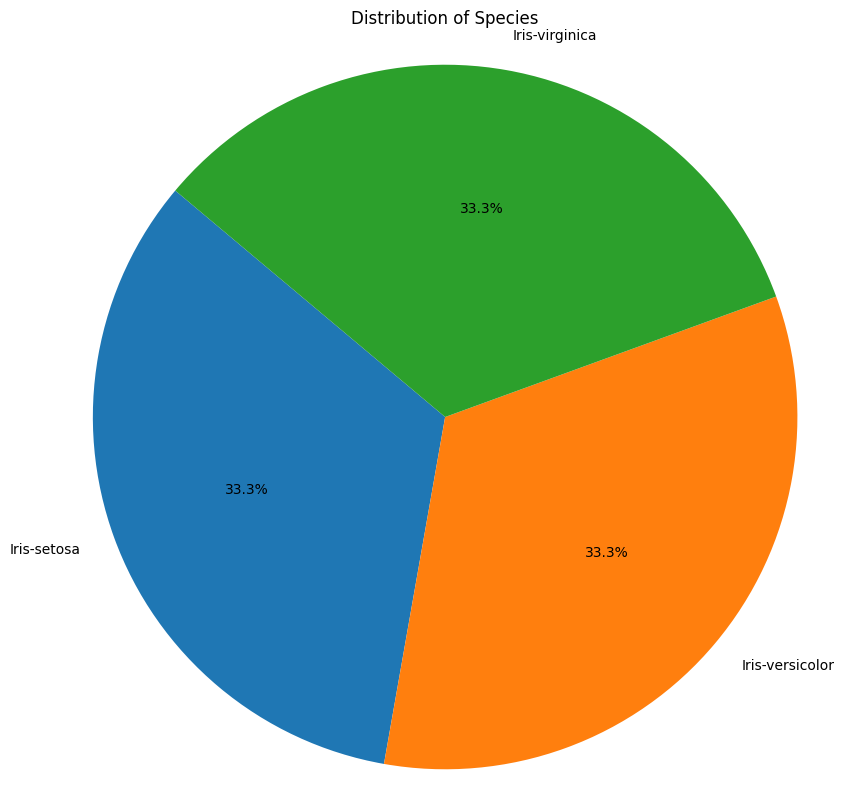

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the "Genre" column

# Count the occurrences of each genre
genre_counts = df['species'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Species')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [33]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
# Remove the " min" substring from each value in the "Duration" column
df["species"] = df["species"].str.replace("Iris-setosa", "0")

In [35]:
df["species"] = df["species"].str.replace("Iris-virginica", "1")

In [36]:
df["species"] = df["species"].str.replace("Iris-versicolor", "2")

In [37]:
# Convert the "species" column to integers
df["species"] = df["species"].astype(int)

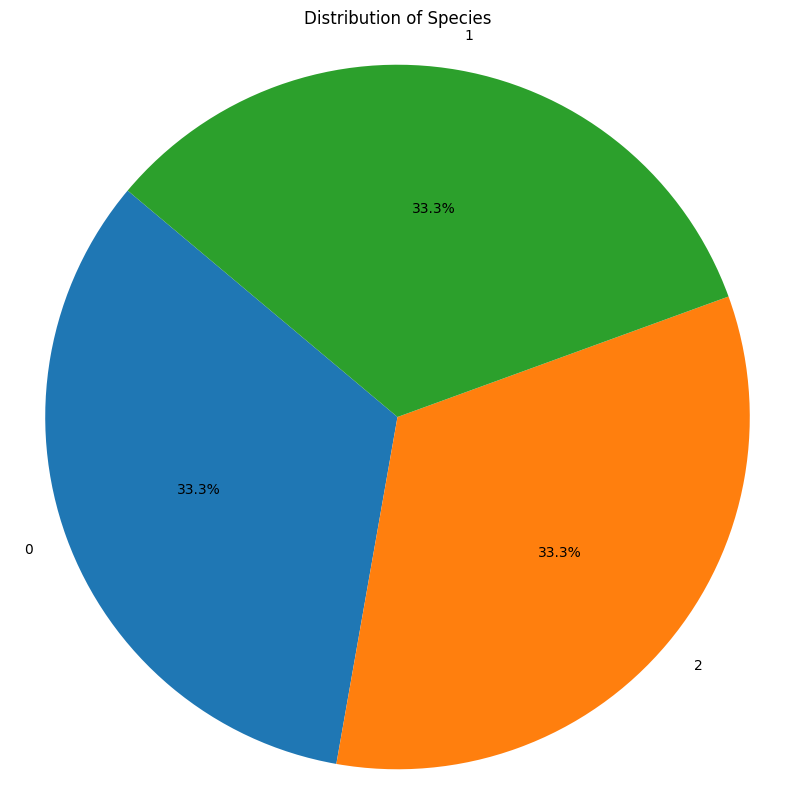

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the "Genre" column

# Count the occurrences of each genre
genre_counts = df['species'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Species')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

MODEL DEVELOPMENT

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
data = df
data2 = df

In [41]:
# Separate features (X) and target variable (y)
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['species'])
y = df['species']

In [42]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
#IMPORTING RELEVANT CLASSES
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

In [45]:
from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
num_folds = 10

# Define the cross-validation method (K-Fold)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=kf)

In [46]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [47]:
# Make predictions
predictions = rf_classifier.predict(X_test)

In [48]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [49]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['species'])
y = data['species']

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.2847090968645339
R-squared: 0.5496692668223541
